In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import calendar
import matplotlib.pyplot as plt
from datetime import datetime

import os
print(os.listdir("../input"))

['sampleSubmission.csv', 'test.csv', 'train.csv']


In [41]:
train = pd.read_csv('../input/train.csv')
test = pd.read_csv('../input/test.csv')

In [42]:
'''
1. Data exploration 
'''
print(train.head())
print(train.tail())

              datetime  season  holiday  workingday  weather  temp   atemp  \
0  2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1  2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2  2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3  2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4  2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  
0        81        0.0       3          13     16  
1        80        0.0       8          32     40  
2        80        0.0       5          27     32  
3        75        0.0       3          10     13  
4        75        0.0       0           1      1  
                  datetime  season  holiday  workingday  weather   temp  \
10881  2012-12-19 19:00:00       4        0           1        1  15.58   
10882  2012-12-19 20:00:00       4        0           1        1  14.

In [43]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [44]:
#check the missing value 
np.sum(pd.isnull(train))

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [46]:
train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [50]:
'''
2. Data preprocessing & Visualization
'''
train['tempDate'] =train.datetime.apply(lambda x:x.split())
train['year'] = train.tempDate.apply(lambda x:x[0].split('-')[0])
train['month'] = train.tempDate.apply(lambda x:x[0].split('-')[1])
train['day'] = train.tempDate.apply(lambda x:x[0].split('-')[2])
train['weekday'] = train.tempDate.apply(lambda x: calendar.day_name[datetime.strptime(x[0], '%Y-%m-%d').weekday()])

train['hour'] = train.tempDate.apply(lambda x: x[1].split(':')[0])

In [60]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
 12  year        10886 non-null  int64  
 13  month       10886 non-null  object 
 14  day         10886 non-null  object 
 15  weekday     10886 non-null  object 
 16  hour        10886 non-null  object 
dtypes: float64(3), int64(9), object(5)
memory usage: 1.4+ MB


In [63]:
train['year'] = pd.to_numeric(train.year)
train['month'] = pd.to_numeric(train.month)
train['day'] = pd.to_numeric(train.day)
train['hour'] = pd.to_numeric(train.hour)

In [64]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,weekday,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,Saturday,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,Saturday,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,Saturday,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,Saturday,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,Saturday,4


In [54]:
train = train.drop('tempDate', axis =1)

KeyError: "['tempDate'] not found in axis"

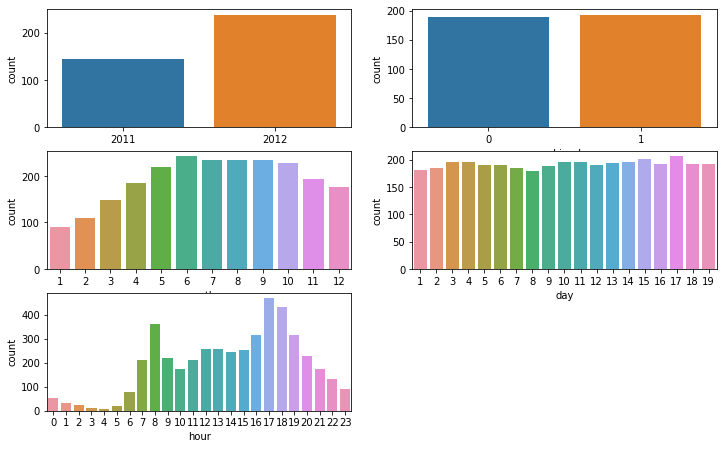

In [65]:
# compare mean of features and count

# year vs count
fig = plt.figure(figsize = [12, 10])
axes1 = fig.add_subplot(2,2,1)
axes1 = sns.barplot(x = 'year', y = 'count', data= train.groupby('year')['count'].mean().reset_index())

# month vs count
axes3 = fig.add_subplot(2,2,2)
axes3 = sns.barplot(x = 'month', y = 'count', data = train.groupby('month')['count'].mean().reset_index())

# day vs count
axes4 = fig.add_subplot(2,2,3)
axes4 = sns.barplot(x = 'day', y = 'count', data = train.groupby('day')['count'].mean().reset_index())

# hour vs count 
axes5 = fig.add_subplot(2,2,4)
axes5 = sns.barplot(x = 'hour', y = 'count', data = train.groupby('hour')['count'].mean().reset_index())

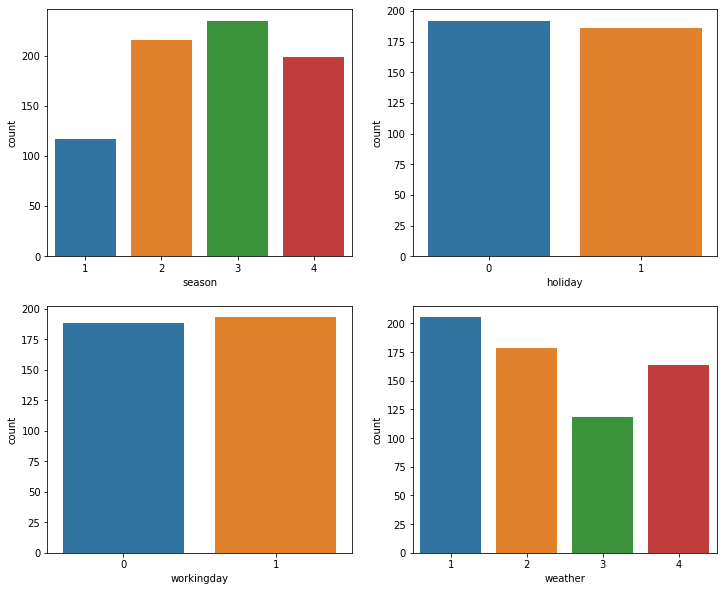

In [69]:
#season vs count
fig = plt.figure(figsize = [12,10])
ax1 = fig.add_subplot(2,2,1)
ax1 = sns.barplot(x = 'season', y = 'count', data = train.groupby('season')['count'].mean().reset_index() )

# holiday vs count
ax2 = fig.add_subplot(2,2,2)
ax2 = sns.barplot(x = 'holiday', y = 'count', data = train.groupby('holiday')['count'].mean().reset_index())

# workingday vs count
ax3 = fig.add_subplot(2,2,3)
ax3 = sns.barplot(x = 'workingday', y = 'count', data = train.groupby('workingday')['count'].mean().reset_index())

#weather vs count
ax4 = fig.add_subplot(2,2,4)
ax4 = sns.barplot(x = 'weather', y = 'count', data= train.groupby('weather')['count'].mean().reset_index())

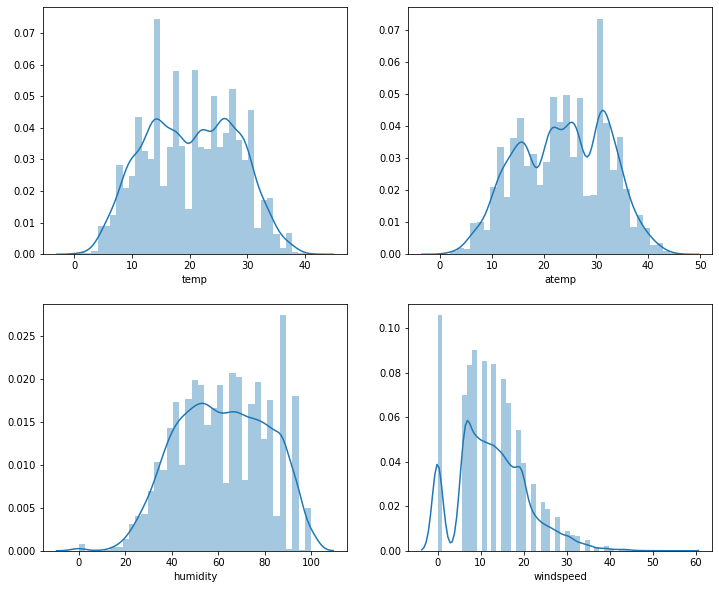

In [89]:
fig = plt.figure(figsize = [12,10])

#temp vs count
fig.add_subplot(2,2,1)
sns.distplot(train.temp)

#atemp vs count
fig.add_subplot(2,2,2)
sns.distplot(train.atemp)

#humidiy vs count
fig.add_subplot(2,2,3)
sns.distplot(train.humidity)

#windspeed vs count
fig.add_subplot(2,2,4)
sns.distplot(train.windspeed)


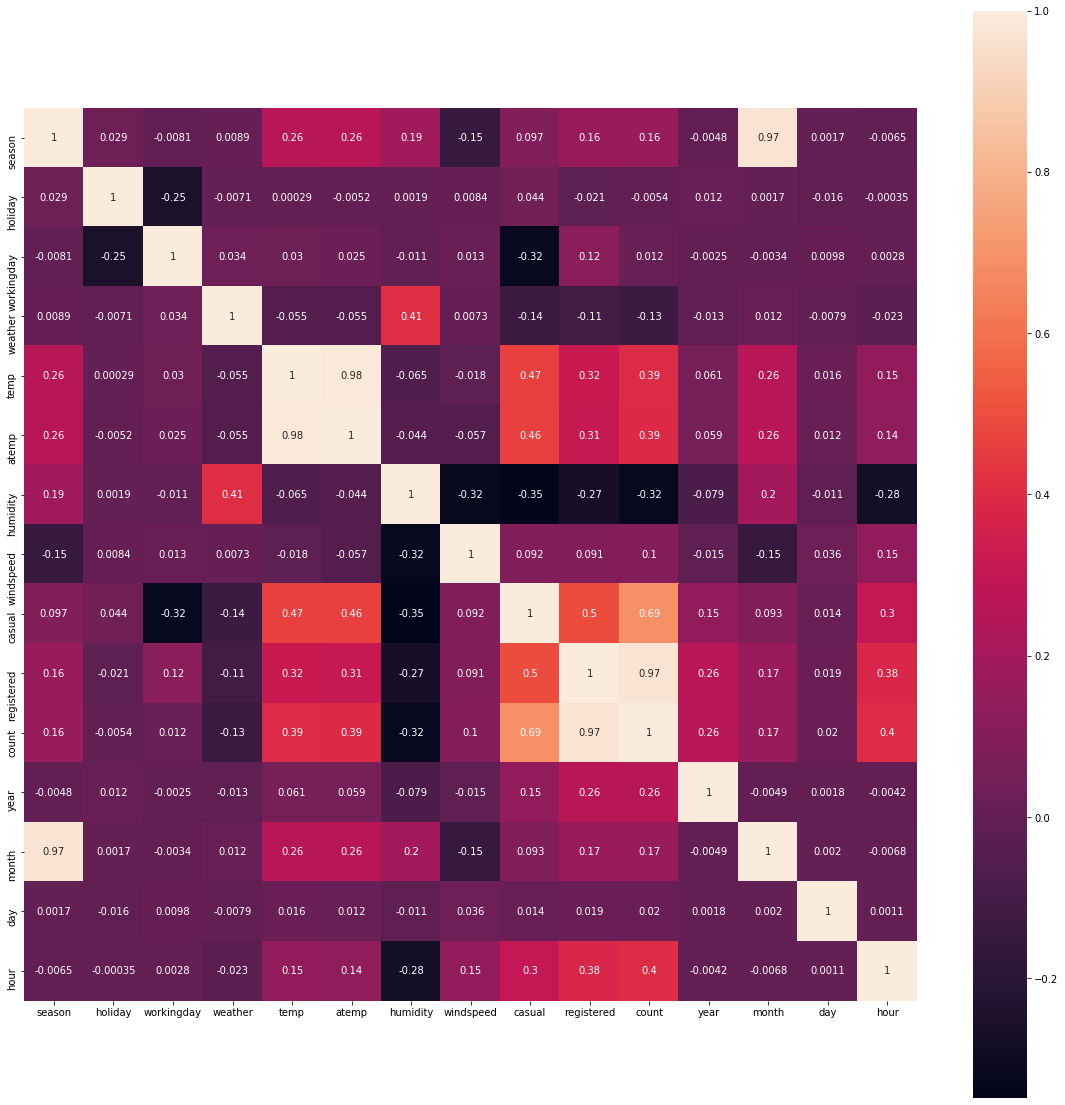

In [94]:
#check correlation coefficient of each features

fig = plt.figure(figsize = [20,20])
fig = sns.heatmap(train.corr(), annot = True, square = True)

it seems that count and hour are highly correlated

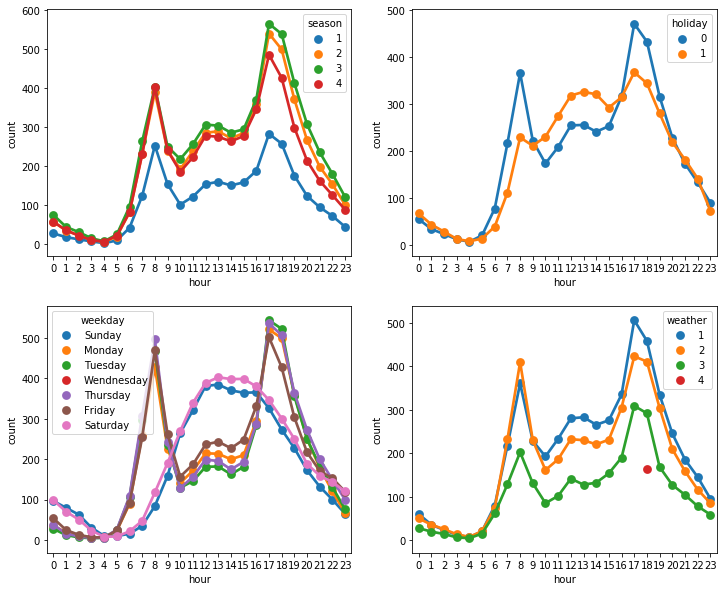

In [111]:
# Visualize based on correlation coefficient

fig = plt.figure(figsize=[12,10])

# count based on hour and season
ax1 = fig.add_subplot(221)
ax1 = sns.pointplot(x='hour',y='count',hue ='season', data = train.groupby(['hour','season'])['count'].mean().reset_index())

# count based on hour and holiday
ax2 = fig.add_subplot(222)
ax2 = sns.pointplot(x = 'hour', y = 'count', hue = 'holiday', data = train.groupby(['hour', 'holiday'])['count'].mean().reset_index())

# count based on hour and weekday
ax3 = fig.add_subplot(223)
ax3 = sns.pointplot(x='hour',y ='count',hue = 'weekday', hue_order=['Sunday','Monday','Tuesday','Wendnesday','Thursday','Friday','Saturday'], data = train.groupby(['weekday','hour'])['count'].mean().reset_index())


# count based on hour and weather
ax4 = fig.add_subplot(224)
ax4 = sns.pointplot(x='hour',y='count',hue='weather',data=train.groupby(['weather','hour'])['count'].mean().reset_index())





the amount of usage are lower on holiday and weekend,
and it points higher during commutal time. so, it seems people use them for commuting reason. 

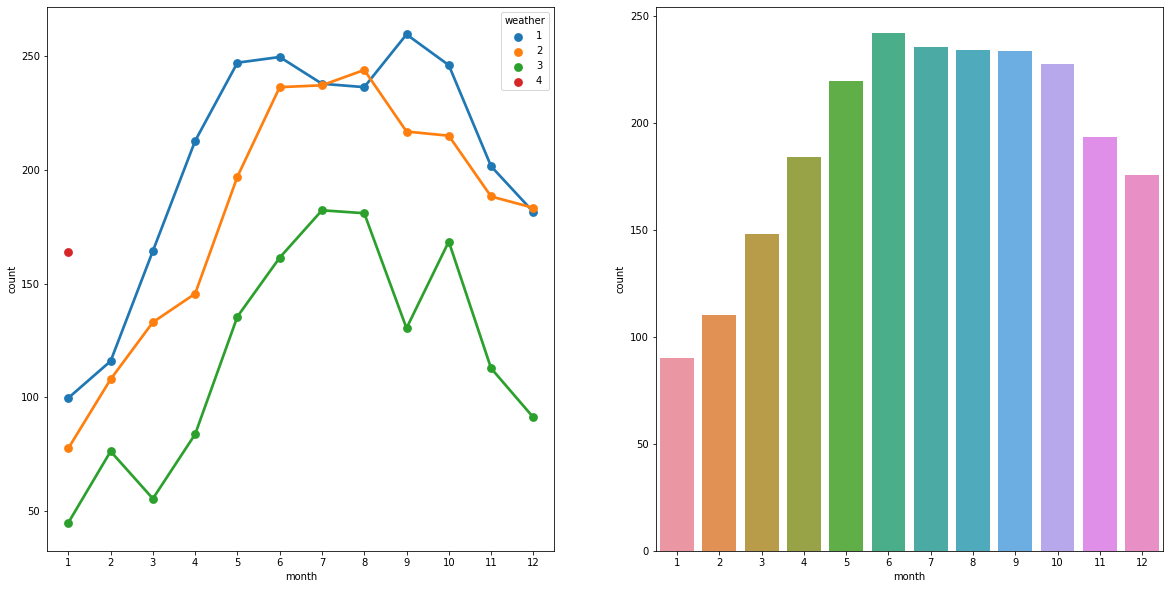

In [120]:
# count based on month and weather
fig = plt.figure(figsize = [20,10])
ax1 = fig.add_subplot(121)
ax1 = sns.pointplot(x = 'month', y = 'count', hue = 'weather', data = train.groupby(['weather', 'month'])['count'].mean().reset_index())

# month vs count
ax2 = fig.add_subplot(122)
ax2 = sns.barplot(x = 'month', y = 'count', data = train.groupby('month')['count'].mean().reset_index())

In [132]:
# convert weekday's datatype of string to numeric
train['weekday'] = train.weekday.astype('category')
train.info()
print(train.weekday.cat.categories)

train.weekday.cat.categories = [5,1,7,0,4,2,3]

print(train.weekday.cat.categories)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   datetime    10886 non-null  object  
 1   season      10886 non-null  int64   
 2   holiday     10886 non-null  int64   
 3   workingday  10886 non-null  int64   
 4   weather     10886 non-null  int64   
 5   temp        10886 non-null  float64 
 6   atemp       10886 non-null  float64 
 7   humidity    10886 non-null  int64   
 8   windspeed   10886 non-null  float64 
 9   casual      10886 non-null  int64   
 10  registered  10886 non-null  int64   
 11  count       10886 non-null  int64   
 12  year        10886 non-null  int64   
 13  month       10886 non-null  int64   
 14  day         10886 non-null  int64   
 15  weekday     10886 non-null  category
 16  hour        10886 non-null  int64   
dtypes: category(1), float64(3), int64(12), object(1)
memory usage: 1.3+ MB
Int64Index([5, 1,

In [144]:
# get new value for windspeed that is 0. 0 means either actual 0 or fail to measure
from sklearn.ensemble import RandomForestRegressor
windspeed0 = train[train.windspeed == 0]
windspeedNot0 = train[train.windspeed !=0]

windspeed0_df = windspeed0.drop(['windspeed','casual','registered','count','datetime'],axis=1)
windspeedNot0_df = windspeedNot0.drop(['windspeed','casual','registered','count','datetime'],axis=1)
windspeedNot0_series = windspeedNot0['windspeed']

rf = RandomForestRegressor()
rf.fit(windspeedNot0_df, windspeedNot0_series)
predicted_windspeed_0 = rf.predict(windspeed0_df)
windspeed0['windspeed'] = predicted_windspeed_0

/Users/kakao/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


In [147]:
#concat splited data to restore original data

train = pd.concat([windspeed0, windspeedNot0], axis = 0)

In [152]:
train.datetime = pd.to_datetime(train.datetime)
train = train.sort_values(by = ['datetime'])

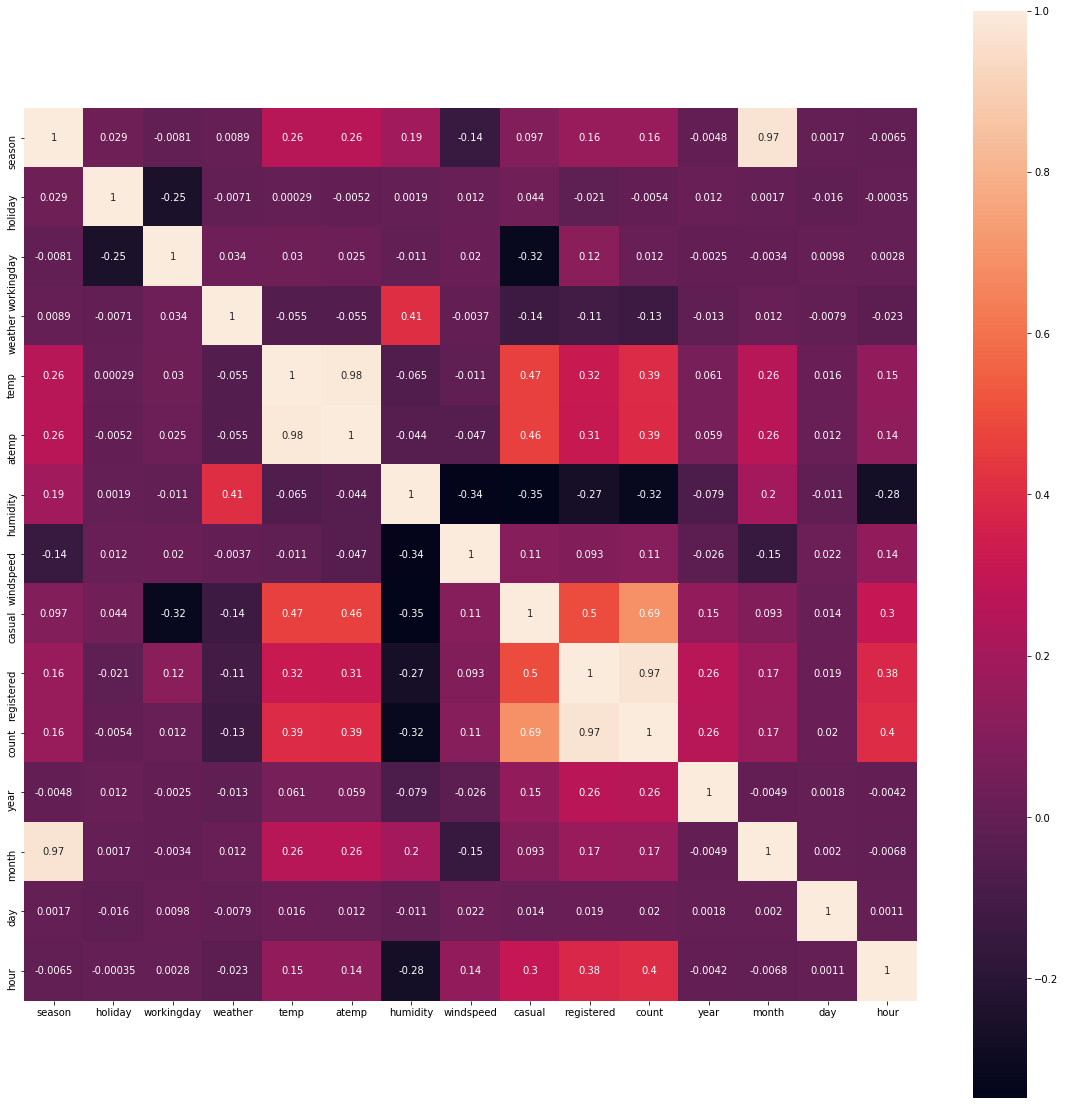

In [155]:
fig = plt.figure(figsize=[20,20])
ax = sns.heatmap(train.corr(),annot=True,square=True)

the correlation coefficient of count and windspeed has increased 0.1 to 0.11

# modeling part to be continued..